# House Prices advanced regression techniques

In [1]:
#Bajar el dataset, crear un jupyter notebook, donde se implementen las diversas etapas, get data, data exploration, prepare data, etc, usar el material visto en clase como referencia (está en el dropbox)
#Probar varios algoritmos, en el caso de la regresion lineal multivariada, usar una implementación propia.

In [2]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from sklearn.preprocessing import Imputer
import numpy as np
import sklearn_pandas


## Get Data

In [3]:
def load_train_data():
    csv_path = os.path.join("train.csv")
    return pd.read_csv(csv_path)
def load_test_data():
    csv_path = os.path.join("test.csv")
    return pd.read_csv(csv_path)

In [4]:
train = load_train_data()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
test = load_test_data()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

El conjunto de entrenamiento tiene 1460 instancias de datos, el de prueba tiene 1459. Con un total de 81 atributos de entrenamiento, y son:
- 43 categóricos
- 36 cuantitativos
- id y SalePrice

In [8]:
train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [9]:
# Resumen estadístico con describe()
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


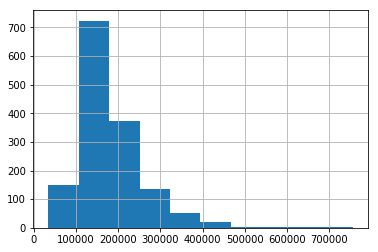

In [10]:
train["SalePrice"].hist()


In [11]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [12]:
#Guardo la columna id
train_ID = train['Id']
test_ID = test['Id']

#Elimino id de mis atributos poque 
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


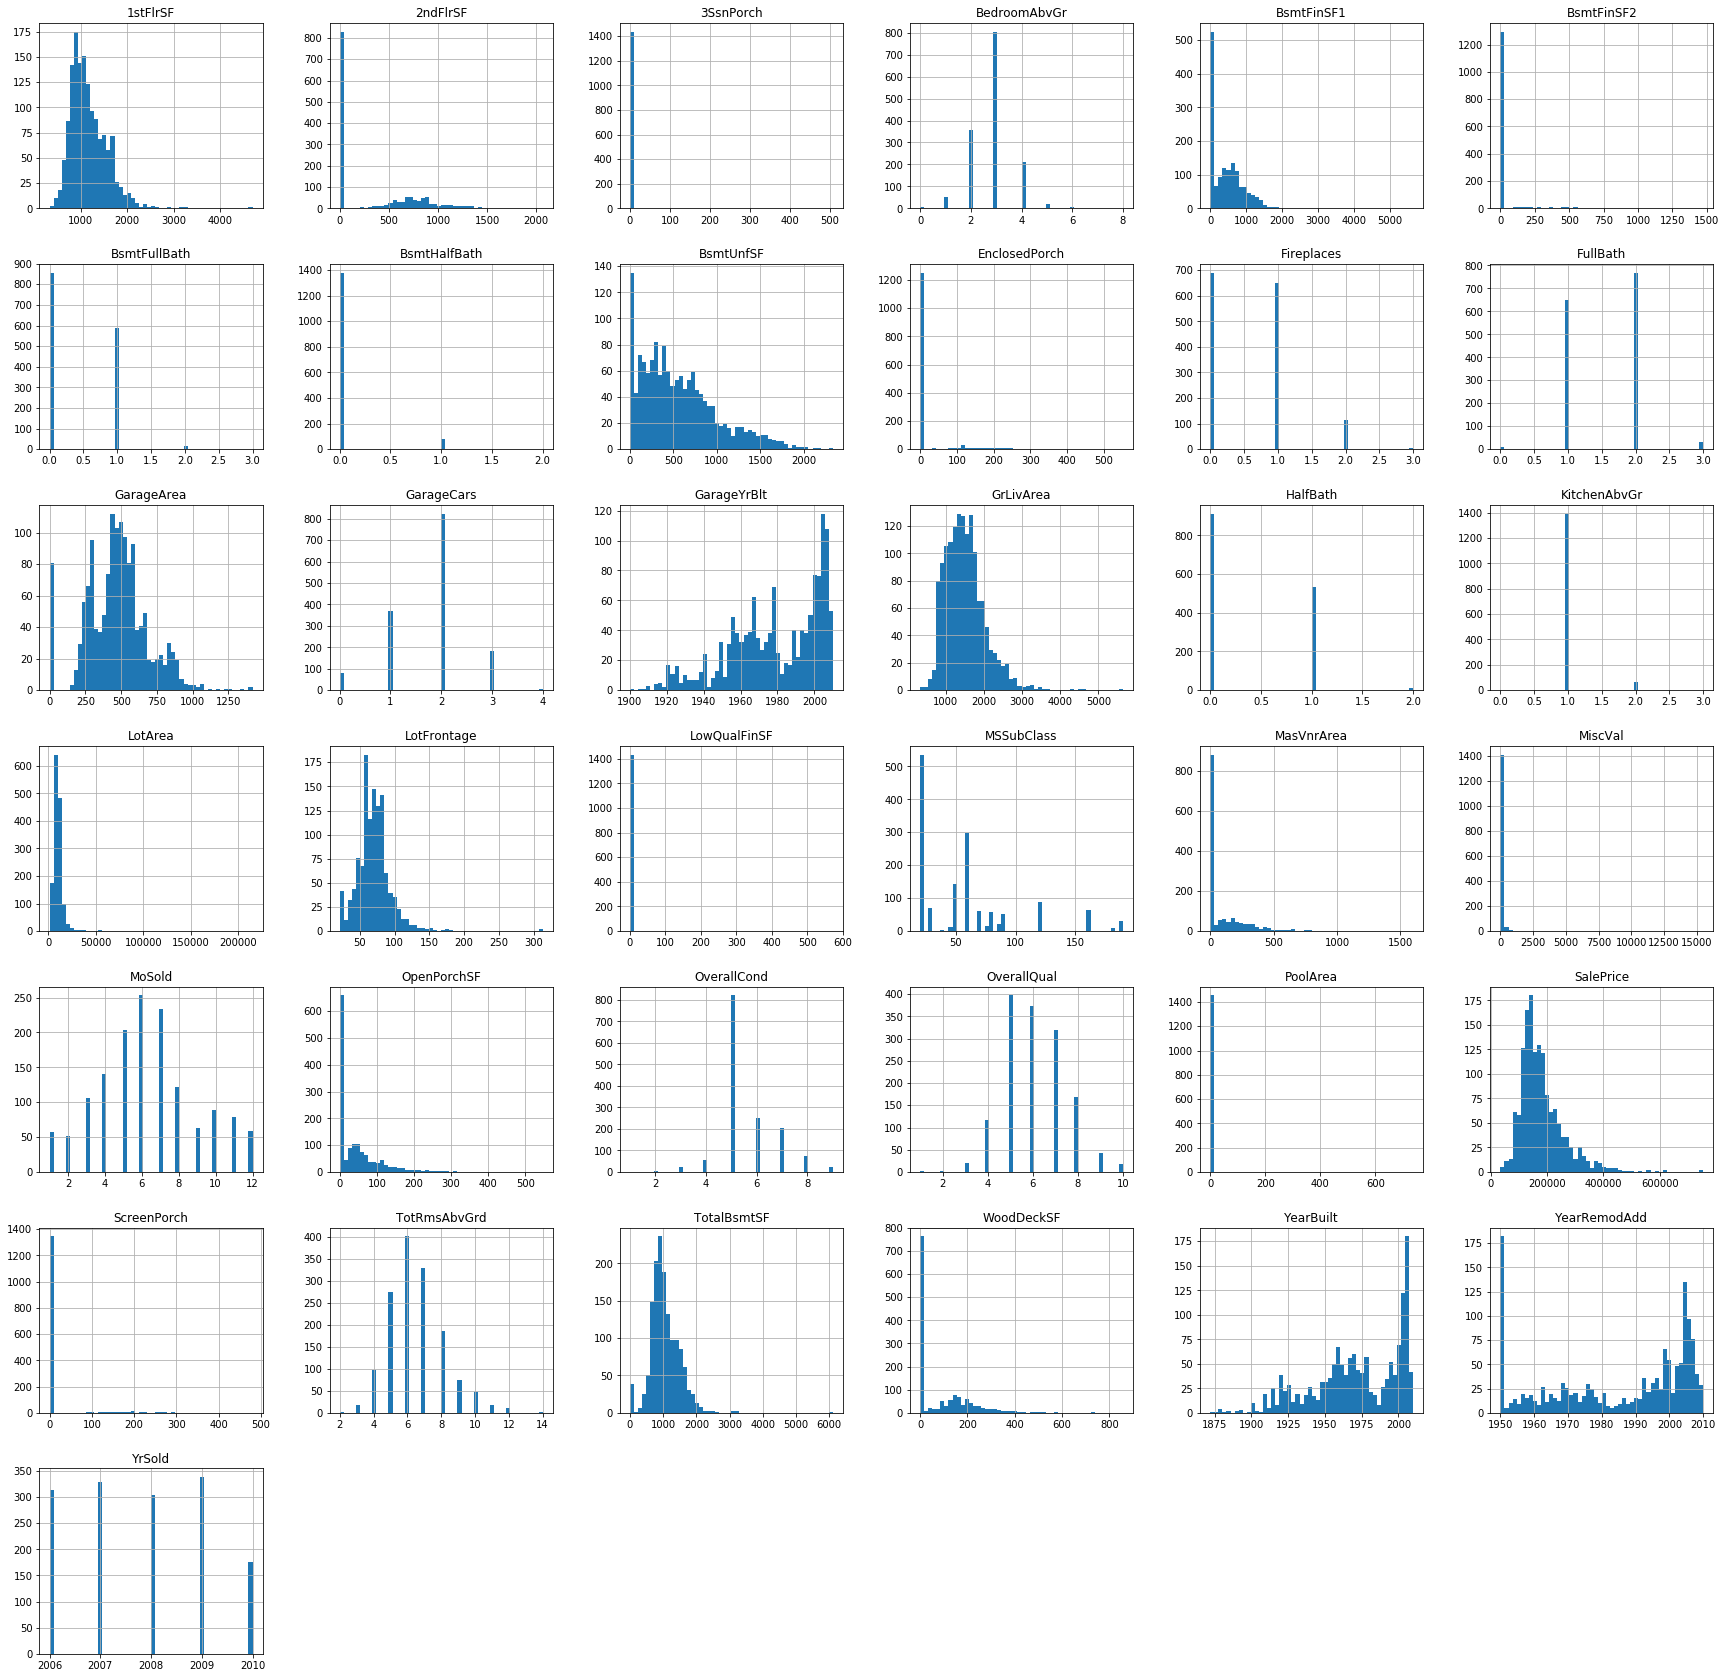

In [13]:
train.hist(bins=50, figsize=(30,30))
plt.show()

In [14]:
#datos incompletos
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total ,percent], axis=1, keys=['Total','Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


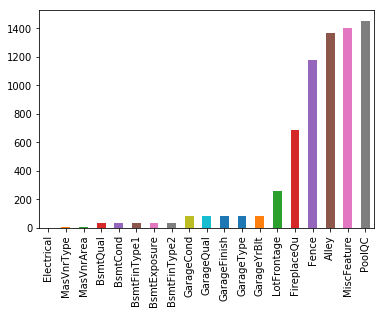

In [15]:
#Datos faltantes o incompletos: 19
incomplete = train.isnull().sum()
incomplete = incomplete[incomplete > 0]
incomplete.sort_values(inplace=True)
incomplete.plot.bar()

In [16]:
# missing values de PoolQC
train["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

## Explore Data

In [17]:
# Columnas que tienen correlacion con SalePrice
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f395b2f2b00>,
      dtype=object)

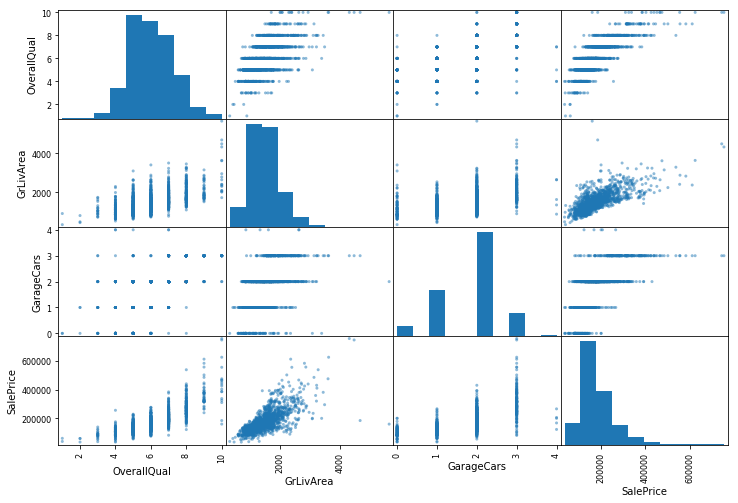

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["OverallQual", "GrLivArea","GarageCars",
              "SalePrice"]
scatter_matrix(train[attributes], figsize=(12, 8))


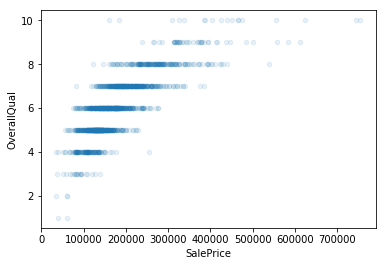

In [19]:
#SalePrice se relaciona mas con OverallQual y GrLivArea
train.plot(kind="scatter", x="SalePrice", y="OverallQual",alpha=0.1)
plt.show()

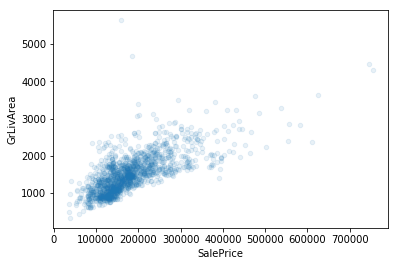

In [20]:
train.plot(kind="scatter", x="SalePrice", y="GrLivArea", alpha=0.1)

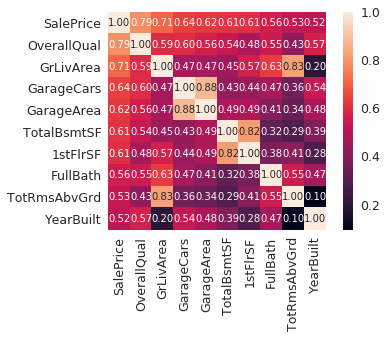

In [21]:
corrmat = train.corr()
k = 10 #numero de variables
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Prepare the data

In [22]:
#obtengo el train sin SalePrice, resultando 80 columnas
housing = train.drop("SalePrice", axis=1) # drop labels for training set
housing_labels = train["SalePrice"].copy() #columna sola
housing.shape

(1460, 79)

In [23]:
#columnas imcompletas
incomplete_rows = housing[housing.isnull().any(axis=1)].head(10)
incomplete_rows

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [24]:
# Agregamos los valores con una mediana
imputer = Imputer(strategy="median")
imputer.strategy

'median'

### 1.Completamos los atributos numéricos con la mediana

In [25]:
#Seleccionamos solas las colum numéricas
housing_num = housing.select_dtypes(include=[np.number]) 
housing_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [26]:
housing_num.median().values #obtengo la mediana de cada atributo, para los missing

array([5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00,
       1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

In [27]:
#antes de operar con la mediana en LotFrontage
housing_num['LotFrontage'].describe() 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [28]:
# x tendra el llenado
imputer.fit(housing_num)
x = imputer.transform(housing_num)

In [29]:
#Muestra del trabajo del Imputer
housing_train = pd.DataFrame(x, columns=housing_num.columns,index = list(housing.index.values))
housing_train.loc[incomplete_rows.index.values]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
5,50.0,85.0,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,0.0,...,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,2009.0
6,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,0.0,...,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
7,60.0,69.0,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,32.0,...,484.0,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11.0,2009.0
8,50.0,51.0,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,0.0,...,468.0,90.0,0.0,205.0,0.0,0.0,0.0,0.0,4.0,2008.0
9,190.0,50.0,7420.0,5.0,6.0,1939.0,1950.0,0.0,851.0,0.0,...,205.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0


In [30]:
#Despues de operar con la mediana
housing_train['LotFrontage'].describe() 

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

### 2.Completamos los atributos categóricos

In [31]:
#Seleccionamos los atriutos categóricos
housing_cat = housing.select_dtypes(include=[np.object])
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [32]:
housing_cat.shape #son en total 43

(1460, 43)

In [33]:
# ejemplo de atributo
housing_cat['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [34]:
# Por ser categorico completamos con la moda
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [35]:
for objeto in housing_cat:
    imputer.fit_transform(housing_cat[objeto])

In [36]:
x = imputer.transform(housing_cat)

In [37]:
housing_train_cat = pd.DataFrame(x, columns=housing_cat.columns,index = list(housing.index.values))
housing_train_cat.loc[incomplete_rows.index.values]
housing_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Normal,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Normal,Normal,Normal,WD,Normal
1,RL,Pave,Normal,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Normal,Normal,Normal,WD,Normal
2,RL,Pave,Normal,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Normal,Normal,Normal,WD,Normal
3,RL,Pave,Normal,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Normal,Normal,Normal,WD,Abnorml
4,RL,Pave,Normal,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Normal,Normal,Normal,WD,Normal


In [38]:
#despues de la llenar con la moda
housing_train_cat['Alley'].describe()

count       1460
unique         3
top       Normal
freq        1369
Name: Alley, dtype: object

In [39]:
#housing_cat_encoded, housing_categories = housing_cat.factorize() no lo permite por ser DataFrame
#housing_cat_encoded[:10]
for cat in housing_cat:
    housing_cat_encoded, housing_categories = housing_cat[cat].factorize()
housing_cat_encoded[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [40]:
housing_categories

Index(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'], dtype='object')

Podemos convertir cada valor categórico en un vector único con un OneHotEncoder

In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<1460x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [43]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [45]:
#Usando el LabelEncoder
from sklearn import preprocessing
for i in range(housing.shape[1]):
    if housing.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(housing.iloc[:,i].values) )
        housing.iloc[:,i] = lbl.transform(list(housing.iloc[:,i].values))
housing.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4


In [46]:
# Por otro lado pudemos usar PIPELINE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

#Optengo los atributos anteriores antes de llenarlos
num_attribs = list(housing.select_dtypes(include=[np.number])) 
cat_attribs = list(housing.select_dtypes(include=[np.object]))

#uno por uno
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs))])

In [47]:
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline)])

In [48]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.07337496, -0.04553194, -0.22087509, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.46031974, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194, -0.08463612, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.30985939, -0.04553194, -0.1754621 , ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194, -0.08463612, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.23325479, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

In [49]:
housing_prepared.shape #tal cual

(1460, 79)

## Selecciono y entreno un modelo

In [50]:
result_rmse=[]

### Regresion Linear

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# probemos la canalización completa en algunas instancias de capacitación
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [215349.39901802 200008.14856832 218165.40487249 171979.92296253
 286998.13943944]


In [53]:
print("Labels:", list(some_labels))

Labels: [208500, 181500, 223500, 140000, 250000]


In [54]:
some_data_prepared

array([[ 0.07337496, -0.04553194, -0.22087509, -0.20714171,  0.06423821,
         0.24471681,  0.75073056,  0.31466687, -0.02618016,  0.60466978,
        -0.22571613, -1.20621453, -0.03628912, -0.03174026, -0.41169079,
         1.02668924,  0.65147924, -0.51719981,  1.05099379,  0.87866809,
        -0.49151573, -0.12579688,  0.74309239,  0.75162623, -1.21648536,
         0.51410389, -0.77797579,  0.36420746,  0.83559903, -0.33983046,
         0.23293722,  0.59190549, -0.43498906,  0.57542484,  0.27284684,
        -0.28865283, -0.94459061, -0.45930254, -0.12304604, -0.88465767,
         0.26381257,  0.30159884, -0.79343379,  1.16185159, -0.12024172,
         0.37033344,  1.10781015, -0.24106104,  0.78974052,  1.22758538,
         0.16377912, -0.21145358, -0.40936914,  0.91220977,  0.25597761,
        -0.95122649,  0.85464957, -0.76873633,  1.01759808, -0.31847458,
         0.31172464,  0.35100032,  0.11211039,  0.06889955,  0.28974476,
        -0.75217584,  0.21650316, -0.3593249 , -0.1

In [55]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse) # Con reg_linear error
result_rmse.append(lin_rmse)

30247.396126423657


In [56]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

18532.572276763032

### Mi Regresion

In [57]:
#Funcion Costo
def costo(X,Y,theta):
    costo = np.dot ((np.dot(X,theta) - Y).T,(np.dot(X,theta) - Y)) # (X*Theta -Y).T * (X*Theta -Y)
    return costo / 2

In [58]:
def predicciones(X,theta):
    pre = (np.dot(X,theta))
    return pre

In [59]:
# Mi Gradiente
def gradiente( X, Y, theta, alpha, iterations):
    m = X.shape[0]
    for i in range(iterations):
        h = np.matmul(X, theta) #hipotesis
        grad = np.matmul(X.T, (h - Y)) / m;
        theta = theta - alpha * grad
    return theta

In [60]:
# Creo mi theta
tamTheta = housing_prepared.shape[1] 
theta = np.zeros(tamTheta).reshape((tamTheta,1))

# Mi y
housing_labels = housing_labels.reshape(len(housing_labels),1)

# Regresion
theta = gradiente(housing_prepared,housing_labels,theta,0.01,30000)
print(theta)

/home/vye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


[[ -4873.4446062 ]
 [  -793.17101285]
 [ -3636.7674178 ]
 [  4288.84144139]
 [  1911.05510485]
 [  1847.74923199]
 [ -1258.52529315]
 [  2298.61273485]
 [ -1439.67955141]
 [    50.29615462]
 [  1406.49617091]
 [  2419.98058248]
 [  -936.70571395]
 [ -2450.45491609]
 [ -3148.49007661]
 [ -1799.47500835]
 [ 14764.33494165]
 [  5660.30001081]
 [  6427.74526102]
 [   367.44817187]
 [  1517.77637358]
 [  3340.22436736]
 [ -3807.86365507]
 [  1981.2449718 ]
 [  2794.28681949]
 [  5993.02234359]
 [ -6751.67763412]
 [   584.92365809]
 [   995.86597994]
 [ -7586.7829779 ]
 [  1680.10161804]
 [ -4242.59065443]
 [ -1106.82655014]
 [  2184.8063447 ]
 [  1017.10546905]
 [  1223.07612745]
 [ -1602.76227458]
 [  1106.85701939]
 [  -577.58359883]
 [ -1449.45257868]
 [  -378.78144886]
 [  -492.76885613]
 [  9511.81292687]
 [  7816.20467658]
 [  -959.94757881]
 [ 13401.96600856]
 [  3364.31780036]
 [  -214.13970938]
 [  2002.70447233]
 [   -56.0880085 ]
 [ -2834.34225275]
 [ -2656.18627876]
 [ -7097.730

In [61]:
mi_predic = predicciones(housing_prepared,theta)
print(mi_predic[:5])
print("Predictions:", lin_reg.predict(some_data_prepared))

[[ 34444.33514984]
 [ 19085.50235423]
 [ 37243.21971741]
 [ -8914.39612146]
 [106076.08583731]]
Predictions: [215349.39901802 200008.14856832 218165.40487249 171979.92296253
 286998.13943944]


In [62]:
print("Labels:", housing_labels[:5])

Labels: [[208500]
 [181500]
 [223500]
 [140000]
 [250000]]


In [63]:
#Error con RMSE
lin_mse = mean_squared_error(housing_labels, mi_predic)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
result_rmse.append(lin_rmse)

183432.26440342586


In [64]:
from sklearn.metrics import mean_absolute_error
# Error absotule
lin_mae = mean_absolute_error(housing_labels, mi_predic)
lin_mae

181393.96219089162

### Tree Regressor

In [65]:
#Escogiendo DecisionTreeRegressor mucho mejor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [66]:
# Error RMSE de tree_reg
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
result_rmse.append(lin_rmse)

0.0


In [67]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

0.0

## Ridge 

In [68]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

clf = linear_model.Ridge(alpha=1.0)
clf.fit(housing_prepared, housing_labels)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
housing_predictions = clf.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
result_rmse.append(lin_rmse)

30247.62670717892


### Random Forest Regresion

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [71]:
# Error RMSE con FOREST 
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
result_rmse.append(lin_rmse)

11853.361905188905


In [72]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

7394.3190410958905

* RandomForestRegressor  tiene un buen funcionamiento con este data_set con un RMSE: 12061.49541808475
* Pero DecisionTreeRegressor tiene un error menor (0.0), sin embargo en el ejemplo del Profesor elige el Random Forest.

# Ajustando modelo

In [73]:
# Cross de Tree Regresion
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [74]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [37319.48697231 35952.39714711 36918.98509593 44204.21700286
 37118.06470602 38965.63759351 32086.23000208 43946.51919484
 56555.56550432 38171.94915665]
Mean: 40123.90523756347
Standard deviation: 6446.623552908695


In [75]:
#Cross de Linear Regre
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.18253559e+04 3.26680817e+04 2.59307050e+04 4.21602036e+04
 3.59760871e+04 2.90754562e+04 6.98642519e+16 2.69038854e+04
 6.55564490e+04 3.53136221e+04]
Mean: 6986425189146153.0
Standard deviation: 2.0959275567333324e+16


In [76]:
#Cross Val de Forest
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels.ravel(),
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [27288.48107022 29851.1749751  24161.13309119 38775.14891352
 35782.8461453  28164.98368339 28537.24540119 25101.60305121
 45542.10580736 29755.83837997]
Mean: 31296.056051845204
Standard deviation: 6373.630692651106


In [77]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     1.151238e+16
std      3.640534e+16
min      2.182536e+04
25%      2.744678e+04
50%      3.399177e+04
75%      4.062473e+04
max      1.151238e+17
dtype: float64

In [78]:
# SVM
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels.ravel())
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels.ravel(), housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

71690.70507247334

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [80]:
#La mejor combinación de hiperentesco encontrada:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [81]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [82]:
#El puntaje de cada combinación de hiperparentesco probado durante la búsqueda de grillas
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

41138.26491621754 {'max_features': 2, 'n_estimators': 3}
35881.299438226946 {'max_features': 2, 'n_estimators': 10}
33911.87695454804 {'max_features': 2, 'n_estimators': 30}
38979.766384340706 {'max_features': 4, 'n_estimators': 3}
33506.174631575246 {'max_features': 4, 'n_estimators': 10}
31539.00115634131 {'max_features': 4, 'n_estimators': 30}
39943.912687051095 {'max_features': 6, 'n_estimators': 3}
33914.93835454482 {'max_features': 6, 'n_estimators': 10}
31488.845177431307 {'max_features': 6, 'n_estimators': 30}
36651.71401440849 {'max_features': 8, 'n_estimators': 3}
32684.659615878238 {'max_features': 8, 'n_estimators': 10}
29964.585148363807 {'max_features': 8, 'n_estimators': 30}
40877.12797791674 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
34865.150184990336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
38739.040350989606 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
33516.83648912232 {'bootstrap': False, 'max_features': 3, 'n_estima

In [83]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.009285,0.000990,-1.692357e+09,-4.163462e+08,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-1.974955e+09,...,-1.420189e+09,-4.102250e+08,-1.505976e+09,-4.205763e+08,-1.957397e+09,-3.805097e+08,0.000170,0.000081,2.310228e+08,5.255917e+07
1,0.027786,0.002045,-1.287468e+09,-2.545775e+08,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-1.085646e+09,...,-1.415372e+09,-2.827542e+08,-9.125403e+08,-2.764287e+08,-1.894303e+09,-2.271659e+08,0.000733,0.000097,3.437653e+08,2.368340e+07
2,0.080414,0.004693,-1.150015e+09,-1.861338e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",8,-8.728130e+08,...,-1.385224e+09,-1.847711e+08,-7.723584e+08,-2.096638e+08,-1.662801e+09,-1.722110e+08,0.002639,0.000020,3.305789e+08,1.404474e+07
3,0.010666,0.000916,-1.519422e+09,-3.326565e+08,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",15,-1.180222e+09,...,-1.653609e+09,-3.378558e+08,-8.247313e+08,-3.249170e+08,-2.259378e+09,-3.047082e+08,0.000101,0.000004,4.875884e+08,2.269956e+07
4,0.045979,0.002889,-1.122664e+09,-2.246403e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",6,-7.463669e+08,...,-1.260605e+09,-2.414739e+08,-8.093012e+08,-2.296331e+08,-1.506772e+09,-2.074310e+08,0.007124,0.000742,2.947729e+08,1.460253e+07
5,0.121140,0.005550,-9.947086e+08,-1.649727e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-6.162413e+08,...,-1.291748e+09,-1.647042e+08,-6.507534e+08,-1.767458e+08,-1.242808e+09,-1.715445e+08,0.007367,0.000515,2.975762e+08,1.025007e+07
6,0.013647,0.001325,-1.595516e+09,-3.807935e+08,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",16,-1.161586e+09,...,-2.267696e+09,-3.989058e+08,-1.309916e+09,-3.241776e+08,-1.463208e+09,-3.028197e+08,0.000500,0.000079,3.928032e+08,5.803829e+07
7,0.047070,0.002572,-1.150223e+09,-2.218035e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",9,-7.316777e+08,...,-1.539296e+09,-2.323116e+08,-7.979397e+08,-2.062862e+08,-1.399038e+09,-2.151530e+08,0.007355,0.000304,3.256512e+08,1.248202e+07
8,0.120497,0.004918,-9.915474e+08,-1.565365e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",2,-5.701607e+08,...,-1.308918e+09,-1.597129e+08,-6.621802e+08,-1.665511e+08,-1.273737e+09,-1.498149e+08,0.008198,0.000262,3.128143e+08,8.753919e+06
9,0.013880,0.000945,-1.343348e+09,-3.636853e+08,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-1.234765e+09,...,-1.381690e+09,-4.165940e+08,-7.911668e+08,-2.967960e+08,-1.822647e+09,-3.404460e+08,0.000793,0.000040,3.371576e+08,4.279159e+07


In [84]:
final_model = grid_search.best_estimator_

#### Veamos si el Test tiene atributos incompletos

In [85]:
x_test = test
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [86]:
from sklearn import preprocessing
for i in range(x_test.shape[1]):
    if x_test.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(x_test.iloc[:,i].values) )
        x_test.iloc[:,i] = lbl.transform(list(x_test.iloc[:,i].values))
x_test_prepared = full_pipeline.fit_transform(x_test)
x_test_prepared
     

array([[-0.87471081, -1.49289614,  0.56732969, ...,  1.71390537,
         0.32424468,  0.20138321],
       [-0.87471081, -0.04659105,  0.61596272, ...,  1.71390537,
         0.32424468,  0.20138321],
       [ 0.06135085, -0.04659105,  0.27553157, ...,  1.71390537,
         0.32424468,  0.20138321],
       ...,
       [-0.87471081, -0.04659105,  4.45797141, ..., -1.35995811,
         0.32424468, -3.58981811],
       [ 0.64638939, -0.04659105, -0.30806469, ..., -1.35995811,
         0.32424468,  0.20138321],
       [ 0.06135085, -0.04659105,  0.27553157, ..., -1.35995811,
         0.32424468,  0.20138321]])

In [87]:
final_predictions = final_model.predict(x_test_prepared)
final_predictions

array([131433.33333333, 155722.73333333, 179493.33333333, ...,
       173241.        , 120972.5       , 242813.86666667])

In [88]:
#Cargo Sample Submission
t_labels = pd.read_csv('sample_submission.csv')
ty = t_labels["SalePrice"].copy() #obtengo el SalePrice
t_ids = t_labels["Id"].copy()
ty.head()

0    169277.052498
1    187758.393989
2    183583.683570
3    179317.477511
4    150730.079977
Name: SalePrice, dtype: float64

In [89]:
final_mse = mean_squared_error(ty, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

69052.38484868906

In [90]:
submission = pd.DataFrame({
    "Id": t_ids,
    "SalePrice": final_predictions
})
submission.to_csv('submission_f.csv', index=False)

In [91]:
submission.head()

,Id,SalePrice
0,1461,131433.333333
1,1462,155722.733333
2,1463,179493.333333
3,1464,189330.000000
4,1465,205000.066667
